## Analisando dados de vendas de veículos no eBay

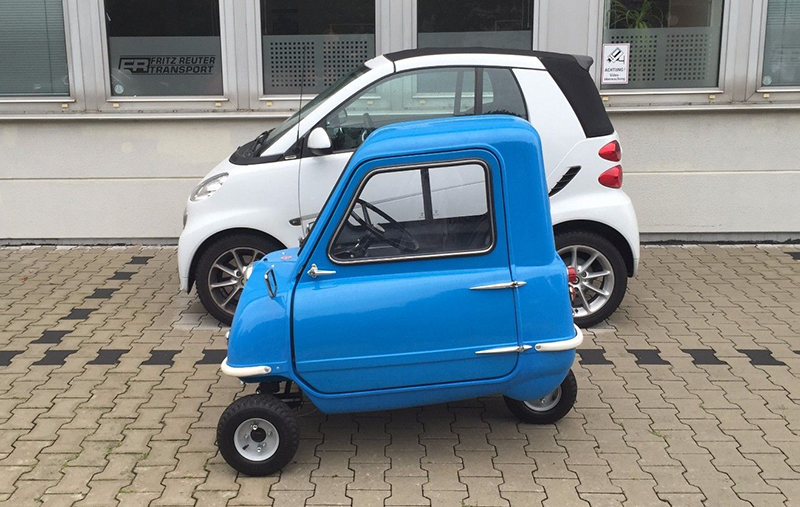

Neste projeto eu trabalhei com um conjunto de dados de veículos usados do eBay Kleinanzeigen, uma seção de classificados da versão alemã do eBay. 

O objetivo deste projeto é limpar e analisar os dados de vendas realizadas, considerando apenas carros usados.

Vou começar importando as bibliotecas necessária e lendo o conjunto de dados utilizando pandas.

Abaixo foram descritas as colunas presentes no conjunto de dados:

- dateCrawled - Quando o anúncio foi veiculado pela primeira vez. Todos os valores de campo são retirados a partir desta data.
- nome - Nome do carro.
- vendedor - Se o vendedor é particular ou um revendedor.
- offerType - O tipo de anúncio
- preço - O preço no anúncio para vender o carro.
- abtest - Se o anúncio está incluído em um teste A/B.
- vehicleType - O tipo de veículo.
- anoOfRegistration - O ano em que o carro foi registrado pela primeira vez.
- caixa de velocidades - O tipo de transmissão.
- powerPS - A potência do carro no PS.
- modelo - O nome do modelo do carro.
- quilômetro - Quantos quilômetros o carro já rodou.
- monthOfRegistration - O mês em que o carro foi registrado pela primeira vez.
- fuelType - Qual o tipo de combustível que o carro usa.
- marca - A marca do carro.
- notRepairedDamage - Se o carro tem um dano que ainda não foi reparado.
- dateCreated - A data em que a listagem do eBay foi criada.
- nrOfPictures - O número de fotos no anúncio.
- postalCode - O código postal para a localização do veículo.
- lastSeenOnline - A data em que o rastreador viu este anúncio pela última vez online.

In [2]:
import pandas as pd
import numpy as np
import re

autos = pd.read_csv(r'C:\Users\msantos\Downloads\autos.csv', encoding = 'Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

Até o momento, a partir dos dados acima, podemos fazer as seguintes observações:

- O conjunto de dados contém 20 colunas, sendo que a maioria delas são strings.
- Os nomes das colunas estão no formato camelcase ao invés do snakecase, o que significa que não podemos simplesmente substituir os espaços pelo caracter underline.
- Algumas colunas têm valores nulos.

Prosseguirei com a conversão dos nomes das colunas do formato camelcase para snakecase, além de reformular alguns nomes, de modo que sejam mais descritivos.

## Limpando os nomes das colunas

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
def cleaned_cols(col):
    col = col.replace('yearOfRegistration','registration_year')
    col = col.replace('monthOfRegistration','registration_month')
    col = col.replace('notRepairedDamage','unrepaired_damage')
    col = col.replace('dateCreated','ad_created')
    # Change the rest of the column names from camelcase to snakecase
    col = re.sub( '(?<!^)(?=[A-Z])', '_', col ).lower()
    return col

autos.columns = [cleaned_cols(c) for c in autos.columns]

autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_p_s', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

## Exploração e limpeza inicial dos dados

In [6]:
# Exploração de dados inicial para identificar qual outra tarefa de limpeza de dados precisa ser realizada
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


A partir da tabela estatística descritiva acima, podemos observar algumas coisas:

- A coluna 'nr_of_pictures' pode ser descartada, pois nenhuma das linhas tem fotos.
- Há algumas linhas de dados na coluna 'registration_year' que podem ser removidas, pois a tabela contém um valor mínimo e máximo de 1000 e 9999, o que é bem improvável para as datas nas quais os veículos foram registrados.
- O valor máximo na coluna 'power_PS' é significativamente maior que o valor de 75% dos dados, o que sugere que alguns dados possam estar imprecisos nesta coluna.
- O valor mínimo na coluna 'registration_month' é 0, algo que não é possível. Isto é mais um indício de linhas de dados imprecisas.
- As colunas seller e offer_type contêm dados cujos valores são praticamente os mesmos, de modo que podem ser removidos tranquilamente.

Podemos ver também que as colunas price e odometer são valores numéricos armazenados como texto, de modo que iremos lidar com estas colunas primeiro, da seguinte forma:

- Removendo quaisquer caracteres não-numéricos.
- Convertendo a coluna para um tipo de dado numérico.

In [7]:
autos['price'].head()

0    $5,000 
1    $8,500 
2    $8,990 
3    $4,350 
4    $1,350 
Name: price, dtype: object

In [8]:
def convert_price(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace('$','')
        string = string.replace(',','')
        return int(string)
    
price = autos['price'].apply(convert_price)
autos['price'] = price
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [9]:
autos['odometer'].head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [10]:
def convert_odometer(column):
    if pd.isnull(column) == True:
        return None
    else:
        string = column.split(' ')[0]
        string = string.replace(',','')
        string = string.replace('km','')
        return int(string)
    
odometer = autos['odometer'].apply(convert_odometer)
autos['odometer'] = odometer
autos['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [11]:
# Renomear odometer para odometer_km, de modo a ter um nome mais descritivo
autos = autos.rename(columns = {'odometer':'odometer_km'})

In [12]:
# Eliminar as colunas que não serão necessárias para nenhuma análise
autos = autos.drop(["nr_of_pictures", "seller", "offer_type"], axis=1)

## Explorando as colunas Odometer e Price

Prosseguirei com a exploração dos dados, procurando especificamente por dados que não parecem corretos, começando pelas colunas odometer_km e price.

In [13]:
print(autos['odometer_km'].unique().shape)
print(autos['odometer_km'].describe())
print(autos['odometer_km'].value_counts())

(13,)
count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64


Existem 13 linhas de dados únicos para a coluna odometer_km, que vão de 5000 km a 150.000 km. É possível observar também que a maioria dos dados estão acima da média (kilometragem acima de 125.732,7). Ao que parece, não há nenhum valor fora da curva (outlier) nesta coluna.

In [14]:
print(autos['price'].unique().shape)
print(autos['price'].describe())
print(autos['price'].value_counts().head(15))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: price, dtype: int64


Podemos ver que existem 1421 linhas com carros que possuem preço de $0, o que parece improvável. Considerando que estes veículos representam cerca de 2\% dos dados, podemos tranquilamente remover estas linhas do conjunto de dados. 

O preço máximo que observamos nesta coluna é de $100.000.000, que é um valor bem alto. Precisarei examinar melhor os valores altíssimos desta coluna.

In [15]:
autos['price'].value_counts().sort_index(ascending = False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price, dtype: int64

In [16]:
autos['price'].value_counts().sort_index(ascending = True).head(15)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price, dtype: int64

Ao olhar para a faixa mais alta de preços da coluna, podemos ver que há um salto significativo de \\$350.000 para \\$999.990. Se observarmos a tendência de aumento de preço antes dessa faixa, vemos um aumento muito mais sutil e constante, de modo que, devido a esta discrepância, podemos remover com segurança os dados que sejam maiores do que \\$350.000.

Podemos ver também que há uma série de preços abaixo de \\$18. Uma vez que o eBay se trata de um site não só de venda, mas de leilões, optarei por manter estes valores, já que é possível que existam lances iniciais de \\$1 por um carro.

In [17]:
autos = autos[autos['price'].between(1, 350000)]
autos['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

## Explorando as colunas com datas

Há uma série de colunas que representam valores de datas:

- date_crawled
- last_seen
- ad_created
- registration_month
- registration_year

Na conjunto de dados, há colunas como date_crawled, last_seen e ad_created que estão todas com dados no formato string. Os dados destas colunas terão de ser convertidos para um formato numérico, de modo que possam ser analisados. As colunas registration_month e registration_year já estão em formato numérico.

Primeiramente, verificarei como os valores dessas três colunas de strings são formatados.

In [18]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [19]:
# Como estamos interessados apenas nas datas, vamos deixar de fora os 10 primeiros caracteres das linhas de cada coluna, que representam horários.
(autos['date_crawled']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Parece que os dados foram pesquisados diariamente no portal do eBay, ao longo de um período de aproximadamente um mês (Março e Abril de 2016). Podemos ver que há uma certa uniformidade na distribuição das listagens pesquisadas.

In [20]:
# Como estamos interessados apenas nas datas, vamos deixar de fora os 10 primeiros caracteres das linhas de cada coluna, que representam horários.
(autos['ad_created']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

Podemos ver que a maioria dos anúncios criados estava dentro de um período de tempo semelhante ao das datas de pesquisa. A menor frequência de anúncios criados antes dessas datas é compreensível, pois uma vez que as vendas tenham sido concluídas, os anúncios podem ser excluídos e não aparecerão no site antes das datas registradas pelo pesquisador.

In [21]:
# Como estamos interessados apenas nas datas, vamos deixar de fora os 10 primeiros caracteres das linhas de cada coluna, que representam horários.
(autos['last_seen']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

A coluna 'last_seen' nos mostra quando o anúncio foi "visto" pela última vez pela ferramenta de pesquisa do portal (crawler). Como é de se esperar, um anúncio sai do ar após o produto ter sido vendido, de modo que a maioria dos dados aqui listados denotam quando um produto foi vendido e teve seu anúncio retirado do portal. 
Tendo isso em mente, nota-se que há, no entanto, um pico na distribuição dos últimos três dias'. Esta alta distribuição observada durante este período provavelmente não é devido a um aumento drástico nas vendas, pois os dias anteriores a estes tiveram uma distribuição mais ou menos homogênea.

Como mencionei anteriormente, existem linhas na coluna register_year que estão incorretas, como o valor mínimo de 1000, que representa um ano no qual carros não haviam sido inventados, e um valor máximo de 9999, que representa muitos anos no futuro.

Podemos seguramente remover quaisquer linhas com anos de registro superiores a 2016 (já que estas pesquisas foram feitas em 2016), pois estes são definitivamente imprecisos. Determinar o período mais precoce para o registro do carro é algo difícil, pois este período pode estar localizado em qualquer espaço temporal do início do século 20. A fim de ter uma estimativa segura, podemos ver qual o percentual de veículos com anos de registro fora do intervalo de 1900 a 2016 e determinar se tal percentual representa um número significativo.

In [22]:
(autos['registration_year'].between(1900,2016)).sum() / autos.shape[0]

0.961206630289303

Considerando que o conjunto de anos fora do intervalo 1900 a 2016 representa 4% dos dados, procederei com a exclusão das linhas deste.

In [23]:
autos = autos[autos['registration_year'].between(1900, 2016)]
autos['registration_year'].value_counts(normalize = True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

Podemos ver que a maioria dos carros listados na coluna registration_year foram registrados nos últimos 20 anos.

## Explorando os preços dos veículos de acordo com a marca

Agora explorarei os preços dos veículos comercializados, levando em conta suas respectivas marcas.

In [24]:
autos['brand'].value_counts(normalize = True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

Os fabricantes alemães representam uma das 5 maiores marcas de carros, sendo responsáveis por quase 50% das listagens de venda de carros do eBay. A Volkswagen é de longe a marca mais popular, com aproximadamente o dobro de vendas das outras líderes de mercado somadas.

Há muitas vagas que não possuem uma margem representativa dentre as listagens, de modo que vou limitar a análise às marcas que compõem mais de 5% do total dos dados de vendas.

In [25]:
brands = autos['brand'].value_counts(normalize = True)
most_common_brands = brands[brands > 0.05].index
most_common_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [ ]:
brands_mean_price = {}

for brands in most_common_brands:
    brand_only = autos[autos['brand'] == brands]
    mean_price = brand_only['price'].mean()
    brands_mean_price[brands] = int(mean_price)
    
brands_mean_price

Podemos ver que existe uma diferença de preço entre as 5 maiores marcas nos dados de vendas. 

- Os carros fabricados pela Audi, BMW e Mercedes Benz tendem a ter preços mais altos que a concorrência. 
- A Opel e a Ford são as menos caras das 5 maiores marcas
- A Volkswagen está na média. Esta pode ser uma das razões para a popularidade dos carros da Volkswagen.

## Explorando os dados de quilometragem

Adotarei um método similar para chegar no valor da quilometragem média destes carros e então checar se há alguma ligação com o preço médio. Combinarei esses dois objetos em um único dataframe, para que possamos comparar facilmente os dados.

In [29]:
bmp_series = pd.Series(brands_mean_price)
pd.DataFrame(bmp_series, columns=["mean_price"])

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [30]:
brand_mean_mileage = {}

for brands in most_common_brands:
    brand_only = autos[autos['brand'] == brands]
    mean_mileage = brand_only['odometer_km'].mean()
    brand_mean_mileage[brands] = int(mean_mileage)
    
brand_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [31]:
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending = False)
mean_price = pd.Series(brands_mean_price).sort_values(ascending = False)

In [32]:
top_brand_info = pd.DataFrame(mean_mileage, columns = ['mean_mileage'])
top_brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [33]:
top_brand_info['mean_price'] = mean_price
top_brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


Podemos ver que a quilometragem do carro não varia tanto quanto os preços. Vemos que as marcas mais caras geralmente tendem a ter uma quilometragem maior, sendo o único ponto fora da curva (outlier) é a marca Opel.

Continuarei limpando os dados, por meio da identificação dos dados categóricos que usam palavras alemãs e traduzi-los, para então mapear os valores correspondentes em inglês.

In [34]:
autos['gearbox'].value_counts()

manuell      34715
automatik     9856
Name: gearbox, dtype: int64

In [35]:
autos['unrepaired_damage'].value_counts()

nein    33834
ja       4540
Name: unrepaired_damage, dtype: int64

In [36]:
autos['fuel_type'].value_counts()

benzin     28540
diesel     14032
lpg          649
cng           71
hybrid        37
elektro       19
andere        15
Name: fuel_type, dtype: int64

In [37]:
autos['vehicle_type'].value_counts()

limousine     12598
kleinwagen    10585
kombi          8930
bus            4031
cabrio         3016
coupe          2462
suv            1965
andere          390
Name: vehicle_type, dtype: int64

In [38]:
gearbox = {
    'manuell': 'manual',
    'automatik': 'automatic'
}

unrepaired_damage = {
    'nein': 'no',
    'ja': 'yes'
}

autos['gearbox'] = autos['gearbox'].map(gearbox)
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(unrepaired_damage)
autos['fuel_type'] = autos['fuel_type'].replace(['benzin', 'elektro', 'andere'], ['gasoline', 'electric', 'other'])
autos['vehicle_type'] = autos['vehicle_type'].replace(['limousine', 'kleinwagen', 'kombi', 'cabrio', 'andere'], ['sedan', 'small car', 'stationwagen', 'convertible', 'other'])
autos['model'] = autos['model'].replace('andere', 'other')

autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,sedan,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,sedan,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,stationwagen,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Agora investigarei se há ou não uma discrepância de preço para com os carros que foram danificados antes de serem colocados a venda, se comparados com os equivalentes, mas não danificados.

In [39]:
no_yes = ['no', 'yes']

damaged_prices = {}

for i in no_yes:
    damage = autos[autos['unrepaired_damage'] == i]
    mean_price = damage['price'].mean()
    damaged_prices[i] = int(mean_price)
    
damaged_prices

{'no': 7164, 'yes': 2241}

Podemos ver que os carros que foram danificados anteriormente são consideravelmente mais baratos do que aqueles que não sofreram danos antes de serem postos a venda.